# INTRO) IMPORT LIBRARIES

# Importing libraries

In [37]:
#%% INTRO) IMPORT LIBRARIES

#git commit -m ""

import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

#1) IMPORT DATASETS AND INITIAL DATA EXPLORATION

# Importing dataset

In [38]:
#Read csv
ID_bf_1 = pd.read_csv('ID_bf_1.csv')

#Convert to parquet to increase efficiency (reduce data "weight")
ID_bf_1.to_parquet('output.parquet', engine = 'pyarrow')
ID_bf_1_parquet = pd.read_parquet('output.parquet', engine = 'pyarrow')
ID_bf_1_parquet = pd.DataFrame(ID_bf_1_parquet)
display(ID_bf_1_parquet.head())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


# Make preliminary inspections

In [7]:
#print dataset's variables' basic information
display(ID_bf_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

None

In [8]:
#print dataset's variables' basic summary stats
display(ID_bf_1.describe())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [9]:
#print dataset's variables' basic summary stats
display(ID_bf_1.corr())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033701,0.062959,0.000567,-0.024524,0.005212,-0.016892,...,-0.013180,-0.003222,-0.035156,0.068907,0.016885,0.008999,-0.050296,0.035704,NaN,0.013250
income,0.045079,1.000000,-0.038519,0.018209,-0.036985,0.125822,-0.015877,0.059046,-0.080581,-0.096431,...,0.014979,-0.004514,0.086861,0.108868,0.011452,-0.055430,-0.043584,-0.009992,NaN,0.116479
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050305,-0.048902,-0.007736,0.029040,0.025114,0.024881,...,0.008966,-0.006351,0.011021,0.073159,-0.015224,0.005998,0.014342,-0.017804,NaN,-0.042949
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.271730,-0.069178,0.078107,-0.009428,-0.029638,-0.001265,...,0.004757,-0.045550,-0.042949,-0.028474,0.019242,0.051425,0.031672,0.011924,NaN,-0.001793
current_address_months_count,0.033701,-0.036985,0.050305,-0.271730,1.000000,0.142863,-0.057836,0.057601,0.047286,0.027508,...,-0.088268,0.071997,0.060732,0.130594,-0.012355,-0.033574,-0.050539,-0.000760,NaN,-0.024541
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142863,1.000000,-0.035999,-0.013000,-0.014176,-0.022063,...,-0.147098,0.012907,0.108743,0.148857,-0.001606,0.025049,-0.024272,0.025709,NaN,0.005694
days_since_request,0.000567,-0.015877,-0.007736,0.078107,-0.057836,-0.035999,1.000000,0.019782,0.000249,0.027968,...,0.005130,-0.027460,-0.048861,-0.068670,0.001066,0.049613,0.000337,0.009025,NaN,-0.017938
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057601,-0.013000,0.019782,1.000000,0.002251,0.042849,...,0.038625,0.178374,0.096676,0.057860,0.007933,0.022811,-0.020689,-0.019910,NaN,-0.043070
zip_count_4w,0.005212,-0.080581,0.025114,-0.029638,0.047286,-0.014176,0.000249,0.002251,1.000000,0.142372,...,0.012122,0.053637,-0.015015,-0.011651,0.017212,0.039687,0.022283,0.020550,NaN,-0.287203
velocity_6h,-0.016892,-0.096431,0.024881,-0.001265,0.027508,-0.022063,0.027968,0.042849,0.142372,1.000000,...,-0.010751,0.014874,-0.007049,-0.025005,-0.000450,0.054491,0.002797,0.030030,NaN,-0.409148


In [10]:
#check columns data
'''print("N° occurances per group")
for col in ID_bf_1_parquet.columns:
    print(col)
    print(ID_bf_1_parquet[col].value_counts())
    print("\n")'''

#Check columns data - categorical
print("Share of occurances per group - only categorical")   
def calculate_share_categorical(df):
    shares = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts(normalize = True)
            shares[column] = value_counts
    return pd.DataFrame(shares)

print(calculate_share_categorical(ID_bf_1_parquet))

Share of occurances per group - only categorical
           payment_type  employment_status  housing_status    source  \
AA             0.258249                NaN             NaN       NaN   
AB             0.370554                NaN             NaN       NaN   
AC             0.252071                NaN             NaN       NaN   
AD             0.118837                NaN             NaN       NaN   
AE             0.000289                NaN             NaN       NaN   
BA                  NaN                NaN        0.169675       NaN   
BB                  NaN                NaN        0.260965       NaN   
BC                  NaN                NaN        0.372143       NaN   
BD                  NaN                NaN        0.026161       NaN   
BE                  NaN                NaN        0.169135       NaN   
BF                  NaN                NaN        0.001669       NaN   
BG                  NaN                NaN        0.000252       NaN   
CA             

*After analyzing the dataset, I realized that there is too much data inside, which slows down the whole process due to the slow internet at home. 
Therefore, I will scale down the data set from 100K rows to less than 15K, which is still considered a very large sample. Also, since I want the data structure to remain constant, I will adjust the new dataset so that the ratio of groups in the "device_os" variable is the same (or almost) as before.*

#2) DATA PREPARATION & WRANGLING

# Reducing the dataset

*Recognizing that the data set is too large, the goal of this section is to reduce it from 1M (rows) to 100k. This will be done while keeping the same sample structure by the following specification.*

In [11]:
#Creating separate dataframes
ID_bf_1_parquet_linux     = ID_bf_1_parquet[ID_bf_1_parquet["device_os"] == "linux"]
ID_bf_1_parquet_macintosh = ID_bf_1_parquet[ID_bf_1_parquet["device_os"] == "macintosh"]
ID_bf_1_parquet_other     = ID_bf_1_parquet[ID_bf_1_parquet["device_os"] == "other"]
ID_bf_1_parquet_windows   = ID_bf_1_parquet[ID_bf_1_parquet["device_os"] == "windows"]
ID_bf_1_parquet_x11       = ID_bf_1_parquet[ID_bf_1_parquet["device_os"] == "x11"]

#Calculate the target number of rows
num_rows_linux     = int(15000 * 0.343673)
num_rows_macintosh = int(15000 * 0.051181)
num_rows_other     = int(15000 * 0.335533)
num_rows_windows   = int(15000 * 0.265053)
num_rows_x11       = int(15000 * 0.004560)

#Select the rows within each dataframe at random
np.random.seed(123)

rows_linux     = np.random.choice(ID_bf_1_parquet_linux.index.values, num_rows_linux, replace = False)
rows_macintosh = np.random.choice(ID_bf_1_parquet_macintosh.index.values, num_rows_macintosh, replace = False)
rows_other     = np.random.choice(ID_bf_1_parquet_other.index.values, num_rows_other, replace = False)
rows_windows   = np.random.choice(ID_bf_1_parquet_windows.index.values, num_rows_windows, replace = False)
rows_x11       = np.random.choice(ID_bf_1_parquet_x11.index.values, num_rows_x11, replace = False)

#Create the new reduced df by appending previously created ones
ID_bf_1_parquet_shorter = pd.concat([ID_bf_1_parquet_linux.loc[rows_linux],
                                     ID_bf_1_parquet_macintosh.loc[rows_macintosh],
                                     ID_bf_1_parquet_other.loc[rows_other],
                                     ID_bf_1_parquet_windows.loc[rows_windows],
                                     ID_bf_1_parquet_x11.loc[rows_x11]])

In [12]:
#Show results
display(ID_bf_1_parquet_shorter.head())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
185395,0,0.5,0.593878,-1,43,30,0.003793,51.714133,AA,1152,...,1,500.0,0,INTERNET,5.715711,linux,1,1,0,3
128571,0,0.9,0.378277,-1,5,30,17.436792,-0.401916,AC,3875,...,0,1500.0,0,INTERNET,8.822658,linux,0,1,0,3
617136,0,0.9,0.296548,-1,158,40,0.019407,-0.524750,AC,1102,...,0,500.0,0,INTERNET,3.412784,linux,0,1,0,6
145741,0,0.5,0.119460,46,36,40,0.005966,11.171981,AA,1714,...,1,200.0,0,INTERNET,2.166887,linux,1,1,0,3
706731,0,0.5,0.006554,26,57,20,0.001182,47.029060,AA,1431,...,1,200.0,0,INTERNET,13.203432,linux,1,1,0,0


In [13]:
print("The target is 15000 rows, while the result is: " + str(len(ID_bf_1_parquet_shorter.fraud_bool)) + " which is acceptable.")

The target is 15000 rows, while the result is: 14997 which is acceptable.


# Create new variables

*The data set is reasonably good, no null or missing values, and the variables are correctly labeled. Therefore, I decided to go ahead and artificially create new variables based on their levels and encoded dummies. The decision of whether to transform into levels or encoding dummies depends on the nature of the variable itself.*

*If there are ordinal variables (variables that follow a natural order), it is best to encode them into numerical values that reflect that order. Here, I will proceed by coding them from 1 to 5 according to their numerical value, 1 being very low and 5 very high.*

*However, there are also variables that do not follow a natural order, for which it is wiser to encode them in dummies, creating a new variable for each string or value inside a specific original variable.*

*For the sake of simplicity, but without loss of generality, I decided to create levels for numeric variables only, while encoding dummies for each categorical variable. This will be done using specific functions that will automatically add the newly created columns into the previously specified data set.*

## Convert numerical variables into levels

*The idea of converting them to levels is to reduce excessive variability in the data, but at the same time to convert them to a scale of 1 to 5 in order to expose the advantages of linearity. Obviously, not all variables converted to levels will be truly meaningful, as binary variables or other methodologically different variables have no meaning in levels. These will always will still be part of the function, but will not be used in the model.*

In [14]:
Bank_fraud_df = ID_bf_1_parquet_shorter.copy()

#Create function to convert to 5 levels
def convert_to_levels(x, min_value, max_value):
    interval = (max_value - min_value) / 5
    if x < min_value + interval:
        return 1 #very low
    elif x < min_value + 2 * interval:
        return 2 #low
    elif x < min_value + 3 * interval:
        return 3 #medium
    elif x < min_value + 4 * interval:
        return 4 #high
    else:
        return 5 #very high

#Create a function to find min and max of a certain variable in a dataframe
def categorize_variable(dataframe, variable):
    min_value          = dataframe[variable].min()
    max_value          = dataframe[variable].max()
    dataframe['level'] = dataframe[variable].apply(lambda x : convert_to_levels(x, min_value, max_value))

#Create a function that nests previously created functions, calculates levels for numerical vars only and changes the label accordingly
def categorize_all_variables_in_dataframe(dataframe):
    numerical_vars = dataframe.select_dtypes(include = ['float64', 'int64']).columns #only numeric vars
    for variable in numerical_vars:
        categorize_variable(dataframe, variable)
        dataframe.rename(columns={'level': 'level_' + variable}, inplace = True) #change label level_"variable_name"

#Use the final function
categorize_all_variables_in_dataframe(Bank_fraud_df)

#Inspect the dataframe
print(Bank_fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 185395 to 464274
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   fraud_bool                              14997 non-null  int64  
 1   income                                  14997 non-null  float64
 2   name_email_similarity                   14997 non-null  float64
 3   prev_address_months_count               14997 non-null  int64  
 4   current_address_months_count            14997 non-null  int64  
 5   customer_age                            14997 non-null  int64  
 6   days_since_request                      14997 non-null  float64
 7   intended_balcon_amount                  14997 non-null  float64
 8   payment_type                            14997 non-null  object 
 9   zip_count_4w                            14997 non-null  int64  
 10  velocity_6h                             14997 non-nu

## Encode categorical variables into dummies

*Here I exploit the potential of python's function to get dummies, I create my own function to convert all categorical variables (objects) into dummies and label them accordingly to distinguish them consistently (like in the previous case).*

In [15]:
#Create function to encode categorical variables into dummies
def encode_dummies(dataframe):
    encode_dummies_cols = dataframe.select_dtypes(include = ['object']).columns #select categorical vars only
    for column in encode_dummies_cols:
        encode    = pd.get_dummies(dataframe[column], prefix = 'encoded_' + column) #encode dummies
        dataframe = dataframe.drop(column, axis = 1)
        dataframe = dataframe.join(encode)
    return dataframe

#use the function
Bank_fraud_df = encode_dummies(Bank_fraud_df)

#Create a new parquet file
Bank_fraud_df.to_csv('Bank_fraud_df', sep = '\t', encoding = 'utf-8')

In [16]:
#Inspect the dataframe
print(Bank_fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 185395 to 464274
Data columns (total 80 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   fraud_bool                              14997 non-null  int64  
 1   income                                  14997 non-null  float64
 2   name_email_similarity                   14997 non-null  float64
 3   prev_address_months_count               14997 non-null  int64  
 4   current_address_months_count            14997 non-null  int64  
 5   customer_age                            14997 non-null  int64  
 6   days_since_request                      14997 non-null  float64
 7   intended_balcon_amount                  14997 non-null  float64
 8   zip_count_4w                            14997 non-null  int64  
 9   velocity_6h                             14997 non-null  float64
 10  velocity_24h                            14997 non-nu

In [17]:
#Show results
display(Bank_fraud_df.head())

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,encoded_housing_status_BE,encoded_housing_status_BF,encoded_housing_status_BG,encoded_source_INTERNET,encoded_source_TELEAPP,encoded_device_os_linux,encoded_device_os_macintosh,encoded_device_os_other,encoded_device_os_windows,encoded_device_os_x11
185395,0,0.5,0.593878,-1,43,30,0.003793,51.714133,1152,5253.130627,...,0,0,0,1,0,1,0,0,0,0
128571,0,0.9,0.378277,-1,5,30,17.436792,-0.401916,3875,6042.049973,...,0,0,0,1,0,1,0,0,0,0
617136,0,0.9,0.296548,-1,158,40,0.019407,-0.524750,1102,1947.314560,...,0,0,0,1,0,1,0,0,0,0
145741,0,0.5,0.119460,46,36,40,0.005966,11.171981,1714,9156.861206,...,0,0,0,1,0,1,0,0,0,0
706731,0,0.5,0.006554,26,57,20,0.001182,47.029060,1431,14080.608671,...,0,0,0,1,0,1,0,0,0,0


## Make ex-post summary statistics and plotting

### Adapt new dataframe for plotting

In [18]:
##New dataframes for plotting

#Correlations:

#Subsetting based on each of the three variable supra-groups
Bank_fraud_df_original_vars = Bank_fraud_df.iloc[:,  0:26]
Bank_fraud_df_levels_vars   = Bank_fraud_df.iloc[:, 27:53]
Bank_fraud_df_dummies_vars  = Bank_fraud_df.iloc[:, 54:79]

#Computing the correlation per group
corr_original_vars = Bank_fraud_df_original_vars.corr().round(2)
corr_levels_vars   = Bank_fraud_df_levels_vars.corr().round(2)
corr_dummies_vars  = Bank_fraud_df_dummies_vars.corr().round(2)


#Histograms and boxplots:

#Subsetting and replacing values
Bank_fraud_df_reduced_plots = Bank_fraud_df[['customer_age', 'level_customer_age', 'level_credit_risk_score', 'level_income', 'level_days_since_request', 'fraud_bool']]

#Adapt the dataset for the plotting
Bank_fraud_df_reduced_plots['customer_age_range'] = np.where((Bank_fraud_df_reduced_plots['customer_age'] >=  0) & (Bank_fraud_df_reduced_plots['customer_age'] < 18), '<18',
                                                    np.where((Bank_fraud_df_reduced_plots['customer_age'] >= 18) & (Bank_fraud_df_reduced_plots['customer_age'] < 35), '18-34',
                                                    np.where((Bank_fraud_df_reduced_plots['customer_age'] >= 36) & (Bank_fraud_df_reduced_plots['customer_age'] < 50), '35-49',
                                                    np.where((Bank_fraud_df_reduced_plots['customer_age'] >= 50) & (Bank_fraud_df_reduced_plots['customer_age'] < 70), '50-69',
                                                    '>70'))))

Bank_fraud_df_reduced_plots.drop('customer_age', axis = 1, inplace = True)

Bank_fraud_df_reduced_plots.rename(columns = {'customer_age_range': 'customer_age'}, inplace = True)

<ipython-input-18-d0a90df03b19>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_fraud_df_reduced_plots['customer_age_range'] = np.where((Bank_fraud_df_reduced_plots['customer_age'] >=  0) & (Bank_fraud_df_reduced_plots['customer_age'] < 18), '<18',
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

### Correlation heatmaps

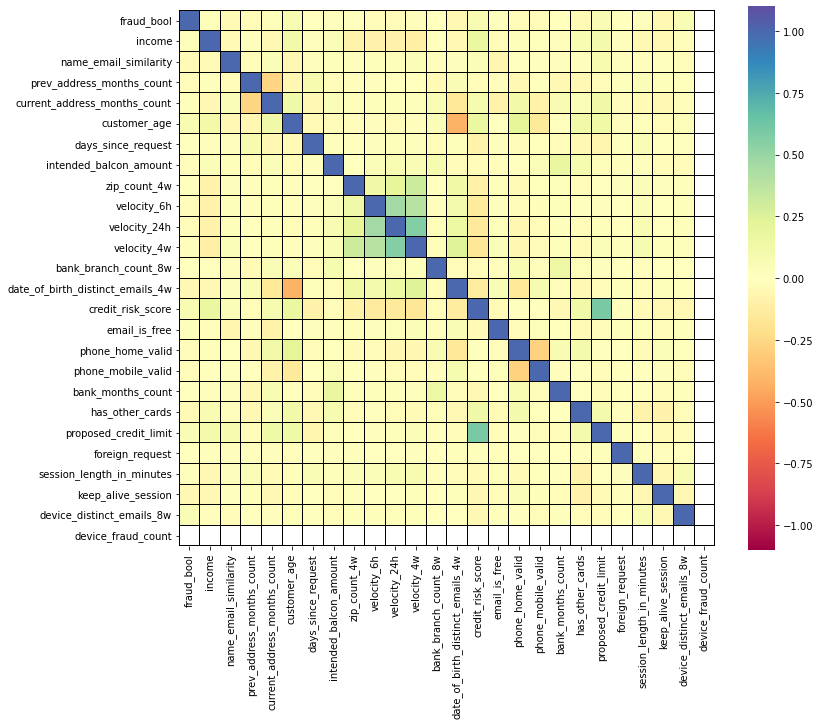

In [19]:
#corr_original_vars
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corr_original_vars,
            cmap = "Spectral", 
            annot = False, linewidths = 0.01, linecolor = "black",
            vmin = -1.10, vmax = 1.10,
            square = True, ax = ax)
plt.show()

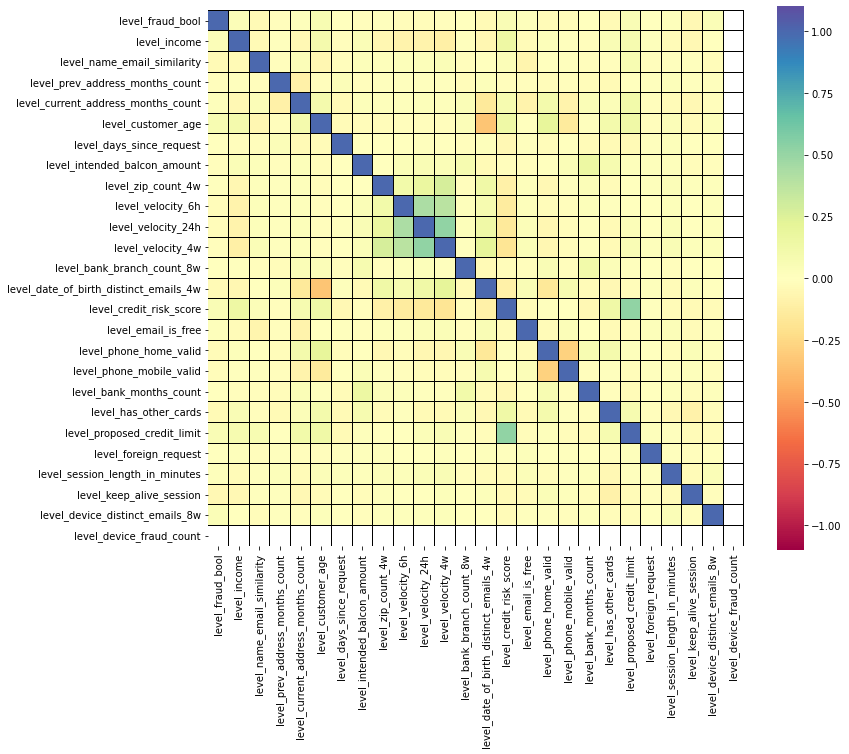

In [20]:
#corr_levels_vars
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corr_levels_vars, 
            cmap = "Spectral", 
            annot = False, linewidths = 0.01, linecolor = "black",
            vmin = -1.10, vmax = 1.10,
            square = True, ax = ax)
plt.show()

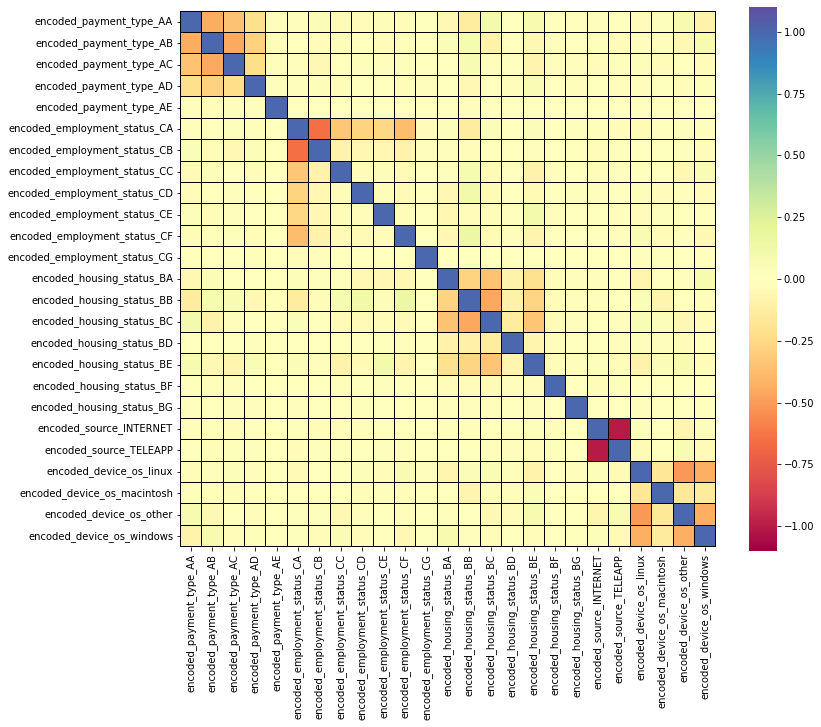

In [21]:
#corr_dummies_vars
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corr_dummies_vars, 
            cmap = "Spectral", 
            annot = False, linewidths = 0.01, linecolor = "black",
            vmin = -1.10, vmax = 1.10,
            square = True, ax = ax)
plt.show()

### Histograms

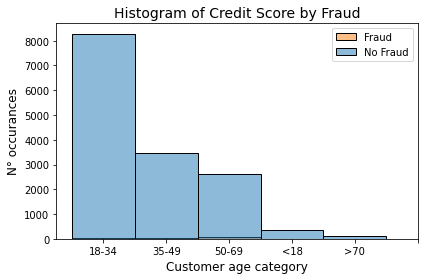

In [22]:
#Level_income by fraud_bool
sns.histplot(x = "customer_age", hue = "fraud_bool", bins=np.arange(0, 6, 1), data = Bank_fraud_df_reduced_plots)
plt.title('Histogram of Credit Score by Fraud', fontsize = 14)
plt.xlabel('Customer age category', fontsize = 12)
plt.ylabel('N° occurances', fontsize = 12)
plt.legend(labels = ['Fraud', 'No Fraud'])
plt.xticks(np.arange(0, 6, 1))
plt.tight_layout()
plt.show()

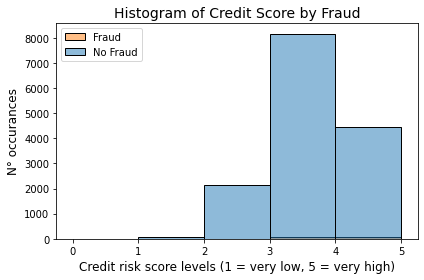

In [23]:
#Level_credit_risk_score by fraud_bool
sns.histplot(x = "level_credit_risk_score", hue = "fraud_bool", bins = np.arange(0, 6, 1), data = Bank_fraud_df_reduced_plots)
plt.title('Histogram of Credit Score by Fraud', fontsize = 14)
plt.xlabel('Credit risk score levels (1 = very low, 5 = very high)', fontsize = 12)
plt.ylabel('N° occurances', fontsize = 12)
plt.legend(labels = ['Fraud', 'No Fraud'])
plt.xticks(np.arange(0, 6, 1))
plt.tight_layout()
plt.show()

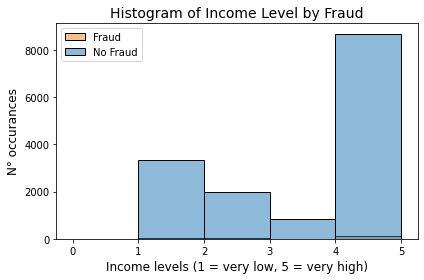

In [24]:
#level_income by fraud_bool
sns.histplot(x = "level_income", hue = "fraud_bool", bins = np.arange(0, 6, 1), data = Bank_fraud_df_reduced_plots)
plt.title('Histogram of Income Level by Fraud', fontsize = 14)
plt.xlabel('Income levels (1 = very low, 5 = very high)', fontsize = 12)
plt.ylabel('N° occurances', fontsize = 12)
plt.legend(labels = ['Fraud', 'No Fraud'])
plt.xticks(np.arange(0, 6, 1))
plt.tight_layout()
plt.show()

### Boxplots

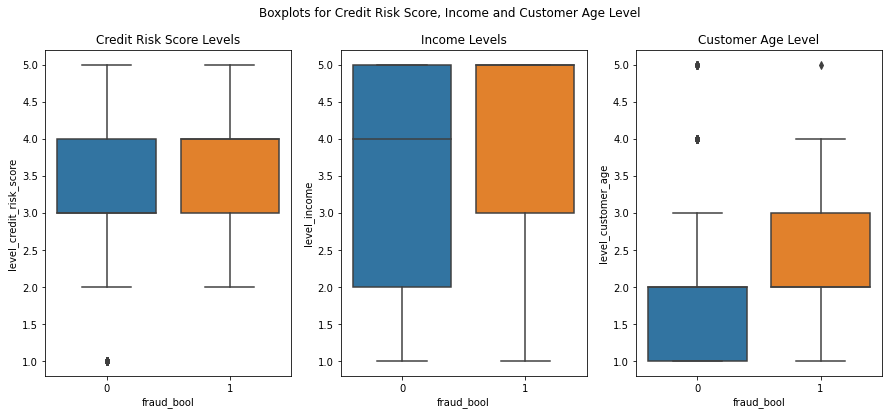

In [25]:
#Plotting the boxplots    
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x = "fraud_bool", y = "level_credit_risk_score", data = Bank_fraud_df_reduced_plots, ax = axs[0])
axs[0].set_title("Credit Risk Score Levels")
sns.boxplot(x = "fraud_bool", y = "level_income", data = Bank_fraud_df_reduced_plots, ax = axs[1])
axs[1].set_title("Income Levels")
sns.boxplot(x = "fraud_bool", y = "level_customer_age", data = Bank_fraud_df_reduced_plots, ax = axs[2])
axs[2].set_title("Customer Age Level")
plt.suptitle("Boxplots for Credit Risk Score, Income and Customer Age Level")
plt.show()

### Log-scaled histograms

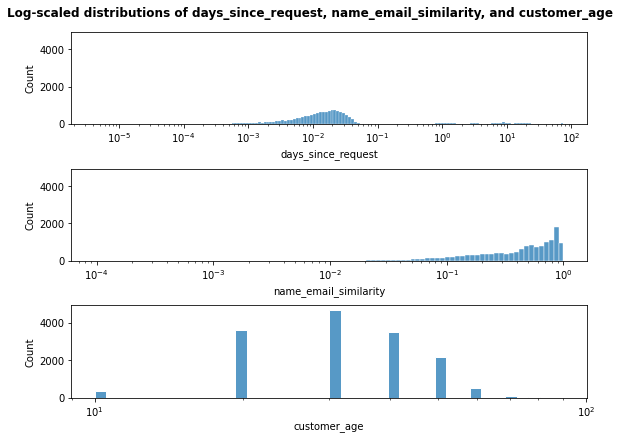

In [26]:
fig, axes = plt.subplots(3, 1, figsize = (8, 6), sharey = True, constrained_layout = True)
fig.suptitle('Log-scaled distributions of days_since_request, name_email_similarity, and customer_age',
             fontweight = "bold")
sns.set_style('darkgrid')
sns.histplot(Bank_fraud_df['days_since_request'], log_scale=True, ax=axes[0])
sns.histplot(Bank_fraud_df['name_email_similarity'], log_scale=True, ax=axes[1])
sns.histplot(Bank_fraud_df['customer_age'], log_scale=True, ax=axes[2])
plt.show()

#3) MODEL DEVELOPMENT

## Create train and test dataframes

In [27]:
#Create dataframe of independent and dependent vars
X_bank_fraud = Bank_fraud_df.drop(['fraud_bool'], axis = 1)
Y_bank_fraud = Bank_fraud_df['fraud_bool']

#Create training and testing dataframes
X_bank_fraud_train, X_bank_fraud_test, Y_bank_fraud_train, Y_bank_fraud_test = train_test_split(X_bank_fraud, Y_bank_fraud, test_size = 0.15, random_state = 1)

#Define independent and the dependent variables
independent_vars = list(X_bank_fraud.columns.values)
dependent_var    = ['fraud_bool']

#Print independent variables
print('The model can accomodate any of the following regressors: ' + str(independent_vars))

The model can accomodate any of the following regressors: ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'level_fraud_bool', 'level_income', 'level_name_email_similarity', 'level_prev_address_months_count', 'level_current_address_months_count', 'level_customer_age', 'level_days_since_request', 'level_intended_balcon_amount', 'level_zip_count_4w', 'level_velocity_6h', 'level_velocity_24h', 'level_velocity_4w', 'level_bank_branch_count_8w', 'level_date_of_birth_distinct_emails_4w', 'lev

## Logit model

### Fit the model

In [28]:
#Fit the model
Logit_model = LogisticRegression()
Logit_model_fit = Logit_model.fit(X_bank_fraud_train[independent_vars], Y_bank_fraud_train)

#Print results
print(Logit_model)

LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predict the outcome of the model

In [29]:
#Predict the target variable for the test data
Logit_predict_y = Logit_model.predict(X_bank_fraud_test[independent_vars])

### Measure the performance of the model

In [34]:
#Measure the model's performance
Accuracy  = accuracy_score(Y_bank_fraud_test, Logit_predict_y)
Precision = precision_score(Y_bank_fraud_test, Logit_predict_y)
Recall    = recall_score(Y_bank_fraud_test, Logit_predict_y)
F1        = f1_score(Y_bank_fraud_test, Logit_predict_y)
AUC       = roc_auc_score(Y_bank_fraud_test, Logit_predict_y)

Coefficients = Logit_model_fit.coef_
Intercept    = Logit_model_fit.intercept_

print('Coefficients:', Coefficients)
print('Intercept   :', Intercept)

print("Accuracy:  ", Accuracy)
print("Precision: ", Precision)
print("Recall:    ", Recall)
print("F1:        ", F1)
print("AUC:       ", AUC)

Coefficients: [[-4.29376993e-04 -2.56445938e-03 -5.31109858e-02 -6.01018513e-04
   1.58298933e-02  7.62909237e-03 -8.91537221e-03  9.03121082e-05
  -3.73749740e-05 -1.71476603e-04 -7.60751064e-04  1.59599877e-04
  -3.04688976e-02  1.35734980e-03  4.40856049e-04 -3.71141361e-03
  -2.96088814e-03 -1.94563924e-02 -3.30473150e-03  4.19877715e-04
  -6.24390281e-05  1.33424368e-02 -4.54982420e-03 -7.45312670e-04
   0.00000000e+00 -2.74558442e-02  5.27981630e-02 -3.92789087e-03
  -1.37489571e-02 -2.23237507e-03 -1.49375480e-03  1.35706344e-03
  -1.98988687e-03 -2.60691747e-03 -1.21123698e-03 -1.57111152e-03
   5.22852036e-04  6.29233639e-03 -1.98663690e-03 -4.46193006e-03
  -4.64722419e-03 -5.05886936e-04 -1.71149656e-02 -1.41128637e-02
  -4.85881592e-03 -1.54882371e-02 -1.26109518e-03 -2.51906724e-03
  -8.01096819e-04 -2.04686079e-02 -7.56540356e-03 -1.13465557e-02
  -1.90384124e-02 -7.58939529e-04 -2.20596247e-03 -1.78802254e-04
   8.79702097e-04 -5.30897495e-06 -1.85332469e-03 -3.77870702e

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot the performance of the model

#### Confusion matrix

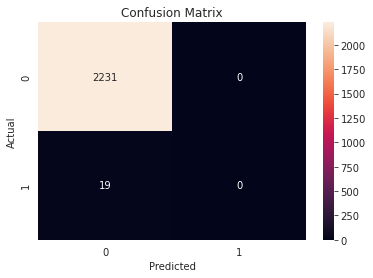

In [35]:
#Confusion matrix
Confusion_matrix = confusion_matrix(Y_bank_fraud_test, Logit_predict_y)
sns.heatmap(Confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve

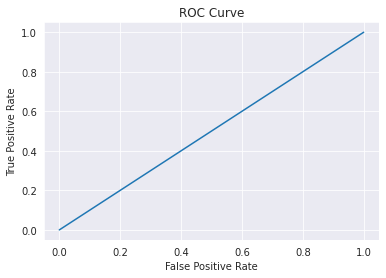

In [36]:
#ROC curve
fpr, tpr, thresholds = roc_curve(Y_bank_fraud_test, Logit_predict_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()